In [1]:
import torch

from end2end import End2End
from datasets import SupervisedDataset
from matplotlib import pyplot as plt
import pickle
import torch


In [2]:
data = SupervisedDataset(input_dir='./data/pedreira/pedreira', input_dim=39)
raw_spikes, targets = data[0]
spikes = torch.from_numpy(raw_spikes).float()
targets = torch.from_numpy(targets)


In [3]:
with open('./local/e2e_sim_s0.pkl', 'rb') as f:
    e2e = pickle.load(f)


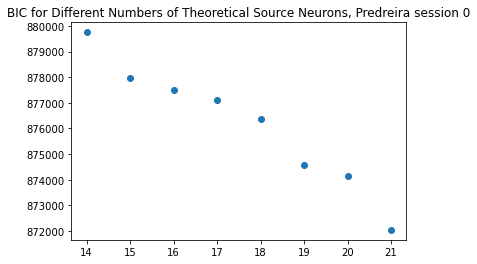

In [4]:
ks, bics = e2e.bics(raw_spikes)
plt.scatter(ks, -1*bics)
plt.title("BIC for Different Numbers of Theoretical Source Neurons, Predreira session 0")
plt.show()

In [5]:
BEST_K = 17
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
labels, _, embeddings = e2e.predict(raw_spikes, BEST_K, return_latent=True)
manifold = tsne.fit_transform(embeddings)
x = manifold[:, 0]
y = manifold[:, 1]

Text(0.5, 1.0, '$t-SNE$ embeddings')

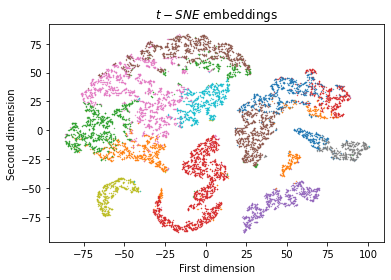

In [6]:
for c in range(BEST_K):
    plt.scatter(x[labels == c], y[labels == c], marker=".", s=.5)
plt.xlabel(r"First dimension")
plt.ylabel(r"Second dimension")
plt.title(r"$t-SNE$ embeddings")

In [12]:
classes = torch.unique(targets)
print(len(classes))

17


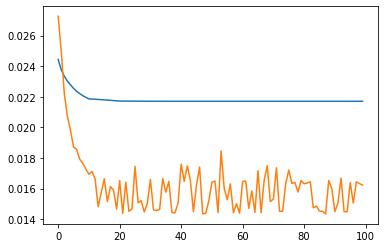

In [9]:
plt.plot(e2e.reconstruction_losses[14])
plt.plot(e2e.center_losses[14])